<a href="https://colab.research.google.com/github/detayans/KNN-NB-project/blob/main/Knn_Nb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load the dataset

In [3]:
# Step 1 - Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)
dataset = pd.read_csv("/content/ortho_knnnb.csv")

In [4]:
dataset.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
#Printing Dimension of datasets
print("Dimension of dataset:", dataset.shape)
print("Number of rows in the dataset:", dataset.shape[0])
print("Number of columns in the dataset:", dataset.shape[1])

Dimension of dataset: (310, 7)
Number of rows in the dataset: 310
Number of columns in the dataset: 7


In [6]:
# printing attributes (columns) name
print("Column Names:",dataset.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [7]:
#About the Data : Biomechanical Features of Orthopedic Patients
#Predict : if their classification as Normal or Abnormal

## Exploratory Data Analysis (EDA)


In [8]:
# Showing datatypes of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [9]:
# getting discriptive statistcs (Summary of the data)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


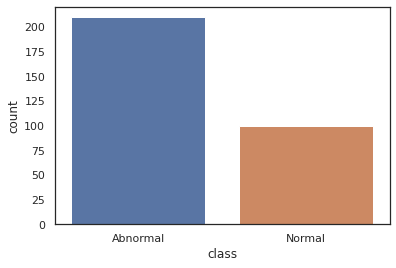

In [10]:
sns.countplot(dataset['class'])

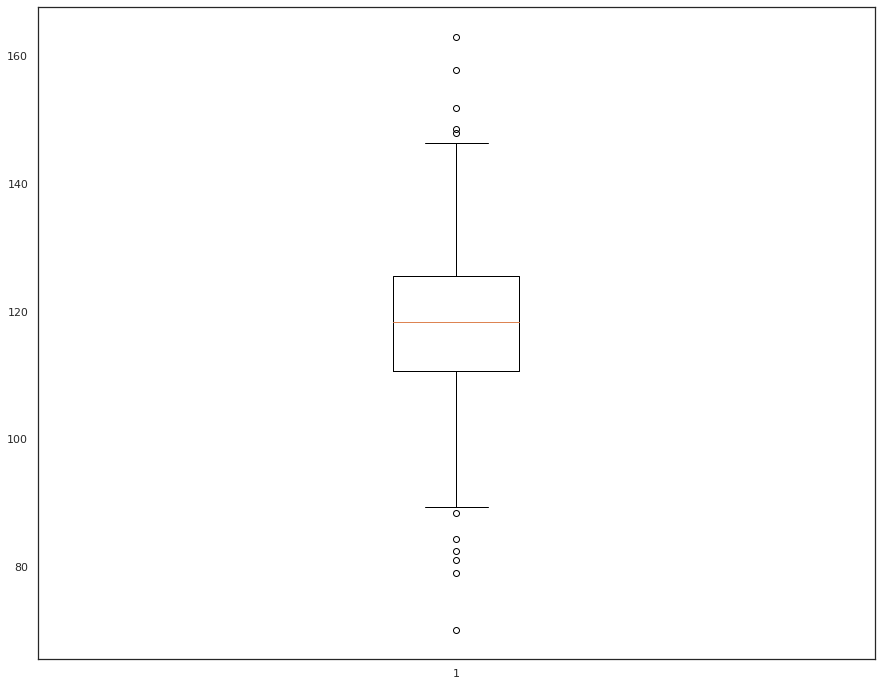

In [11]:
plt.figure(figsize=(15,12))
plt.boxplot(dataset['pelvic_radius'])
plt.show()

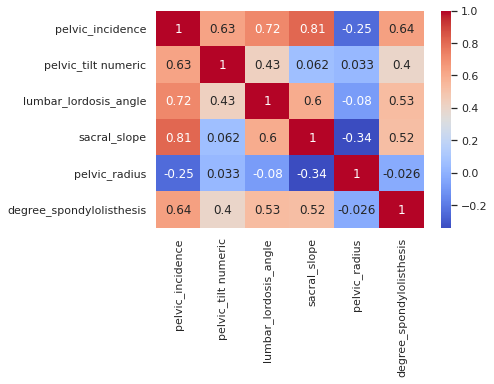

In [12]:
data_corr = dataset.corr()
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.show()

# Section III : Prepare data for Training!


In [13]:
X = dataset.drop(['class'], axis = 1)

In [14]:
Y = dataset['class']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7)
from sklearn.neighbors import KNeighborsClassifier


In [16]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
train_pred = KNN.predict(X_train)
test_pred = KNN.predict(X_test)
train_score = accuracy_score(train_pred, y_train)
test_score = accuracy_score(test_pred, y_test)

In [17]:
train_score


0.8755760368663594

In [18]:
test_score

0.8924731182795699

In [19]:
test_pred

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal

In [20]:
train_accuracy=[]
test_accuracy=[]
for k in range(3, 10):

  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(X_test)
  test_score=(round(accuracy_score(test_pred,y_test)*100,2))
  
  test_accuracy.append(test_score)

 
  print("Test Accuracy: ",test_score,"Value of K: ",k)


Test Accuracy:  86.02 Value of K:  3
Test Accuracy:  83.87 Value of K:  4
Test Accuracy:  89.25 Value of K:  5
Test Accuracy:  86.02 Value of K:  6
Test Accuracy:  91.4 Value of K:  7
Test Accuracy:  86.02 Value of K:  8
Test Accuracy:  93.55 Value of K:  9


In [21]:
# Step 5 - Fit the classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
pred_NB = model.predict(X_test)
pred_NB

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',


In [23]:
test_score=(round(accuracy_score(pred_NB,y_test)*100,2))

In [24]:
print('accuracy of NB is ', test_score)

accuracy of NB is  82.8
